## Import Library

In [37]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import math

warnings.filterwarnings("ignore")

file_path = f"../Dataset/cleaned_dataset.csv"
df = pd.read_csv(file_path)
df = df.drop(columns=["dataset"])
palette = sns.color_palette("Set3", n_colors=10)
col_var = "#fb8072"

# EDA

### Dataset Structure

In [38]:
df.info(show_counts=True, memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3607 entries, 0 to 3606
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3607 non-null   int64  
 1   gender               3607 non-null   int64  
 2   jaundice_history     3607 non-null   int64  
 3   receive_transfusion  3607 non-null   int64  
 4   liver_condition      3607 non-null   int64  
 5   injectable_drug_use  3607 non-null   int64  
 6   drug_use             3607 non-null   int64  
 7   alcohol_consumption  3607 non-null   int64  
 8   alt                  3607 non-null   float64
 9   albumin              3607 non-null   float64
 10  alp                  3607 non-null   float64
 11  ast                  3607 non-null   float64
 12  bun                  3607 non-null   float64
 13  cholesterol          3607 non-null   float64
 14  cpk                  3607 non-null   float64
 15  creatinine           3607 non-null   f

In [39]:
df.head()

,age,gender,jaundice_history,receive_transfusion,liver_condition,injectable_drug_use,drug_use,alcohol_consumption,alt,albumin,...,glucose,total_bilirubin,total_calcium,total_protein,triglycerides,uric_acid,ldh,globulin,osmolality,hcv_status
0,55,2,2,2,2,2,2,1,21.0,4.1,...,92.0,0.3,9.4,7.8,73.0,6.3,98.0,3.7,279.0,0
1,50,2,2,2,2,2,2,2,27.0,4.1,...,93.0,0.6,9.7,7.3,80.0,3.9,141.0,3.2,286.0,0
2,23,1,2,2,2,2,1,1,27.0,4.4,...,76.0,0.6,9.5,7.9,103.0,5.3,143.0,3.5,277.0,0
3,63,2,2,2,2,2,2,1,19.0,4.3,...,80.0,0.9,9.7,6.9,121.0,7.2,136.0,2.6,281.0,0
4,28,2,2,2,2,2,2,1,11.0,4.8,...,83.0,1.1,9.7,7.7,93.0,4.9,89.0,2.9,277.0,0


### Check Missing Value

In [40]:
df.isnull().sum()

age                    0
gender                 0
jaundice_history       0
receive_transfusion    0
liver_condition        0
injectable_drug_use    0
drug_use               0
alcohol_consumption    0
alt                    0
albumin                0
alp                    0
ast                    0
bun                    0
cholesterol            0
cpk                    0
creatinine             0
ggt                    0
glucose                0
total_bilirubin        0
total_calcium          0
total_protein          0
triglycerides          0
uric_acid              0
ldh                    0
globulin               0
osmolality             0
hcv_status             0
dtype: int64

### Descriptive statistics

In [41]:
num_columns = ['age', 'alt', 'albumin', 'alp', 'ast', 'bun', 'cholesterol', 'cpk', 'creatinine', 'ggt', 'glucose', 'total_bilirubin', 'total_calcium', 'total_protein', 'triglycerides', 'uric_acid', 'ldh', 'globulin', 'osmolality']
df_num = df[num_columns]

cat_columns = ['gender', 'jaundice_history', 'receive_transfusion', 'liver_condition', 'injectable_drug_use', 'drug_use', 'alcohol_consumption', 'hcv_status']

df_cat = df[cat_columns].astype("category")

df_cat["gender"] = df_cat["gender"].replace({1: "Male", 2: "Female"})

df_cat["jaundice_history"] = df_cat["jaundice_history"].replace({1: "Yes", 2: "No"})
df_cat["receive_transfusion"] = df_cat["receive_transfusion"].replace({1: "Yes", 2: "No"})
df_cat["liver_condition"] = df_cat["liver_condition"].replace({1: "Yes", 2: "No"})
df_cat["injectable_drug_use"] = df_cat["injectable_drug_use"].replace({1: "Yes", 2: "No"})
df_cat["drug_use"] = df_cat["drug_use"].replace({1: "Yes", 2: "No"})
df_cat["alcohol_consumption"] = df_cat["alcohol_consumption"].replace({1: "Yes", 2: "No"})
df_cat["hcv_status"] = df_cat["hcv_status"].replace({0: "No", 1: "Yes"})


In [42]:
df_num.describe()

,age,alt,albumin,alp,ast,bun,cholesterol,cpk,creatinine,ggt,glucose,total_bilirubin,total_calcium,total_protein,triglycerides,uric_acid,ldh,globulin,osmolality
count,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000
mean,48.372054,21.676065,4.176238,66.526943,23.391576,12.846915,185.060037,116.586380,0.833017,19.898355,93.312401,0.524000,9.328933,7.101622,111.830894,5.102814,127.647957,2.925384,278.219571
std,13.698022,6.661880,0.342779,15.982253,4.937630,3.816316,32.494700,58.762617,0.168823,7.870425,9.719990,0.213830,0.326979,0.364016,56.294157,1.164729,22.598783,0.366918,4.164895
min,20.000000,6.000000,3.300000,20.000000,10.000000,2.000000,83.000000,22.000000,0.360000,5.000000,61.000000,0.010000,8.400000,6.200000,24.000000,1.600000,60.000000,1.900000,266.000000
25%,37.000000,16.570849,3.971148,56.000000,19.413136,10.000000,162.894107,73.000000,0.710000,13.972892,87.787349,0.381653,9.100000,6.818505,67.576954,4.277603,111.000000,2.700000,275.390320
50%,52.000000,21.000000,4.200000,66.324049,23.000000,12.812401,184.000000,100.000000,0.831537,18.000000,92.000000,0.500000,9.300000,7.100000,97.000000,5.026274,126.162402,2.900000,278.000000
75%,60.000000,26.000000,4.400000,76.000000,27.000000,15.375393,206.000000,146.000000,0.957179,25.744407,98.403361,0.699389,9.561535,7.371799,146.000000,5.906388,143.368853,3.200000,281.000000
max,71.000000,45.000000,5.200000,132.000000,36.000000,25.000000,293.000000,312.000000,1.350000,43.000000,125.000000,1.100000,10.300000,8.100000,287.000000,8.300000,195.000000,3.800000,290.000000


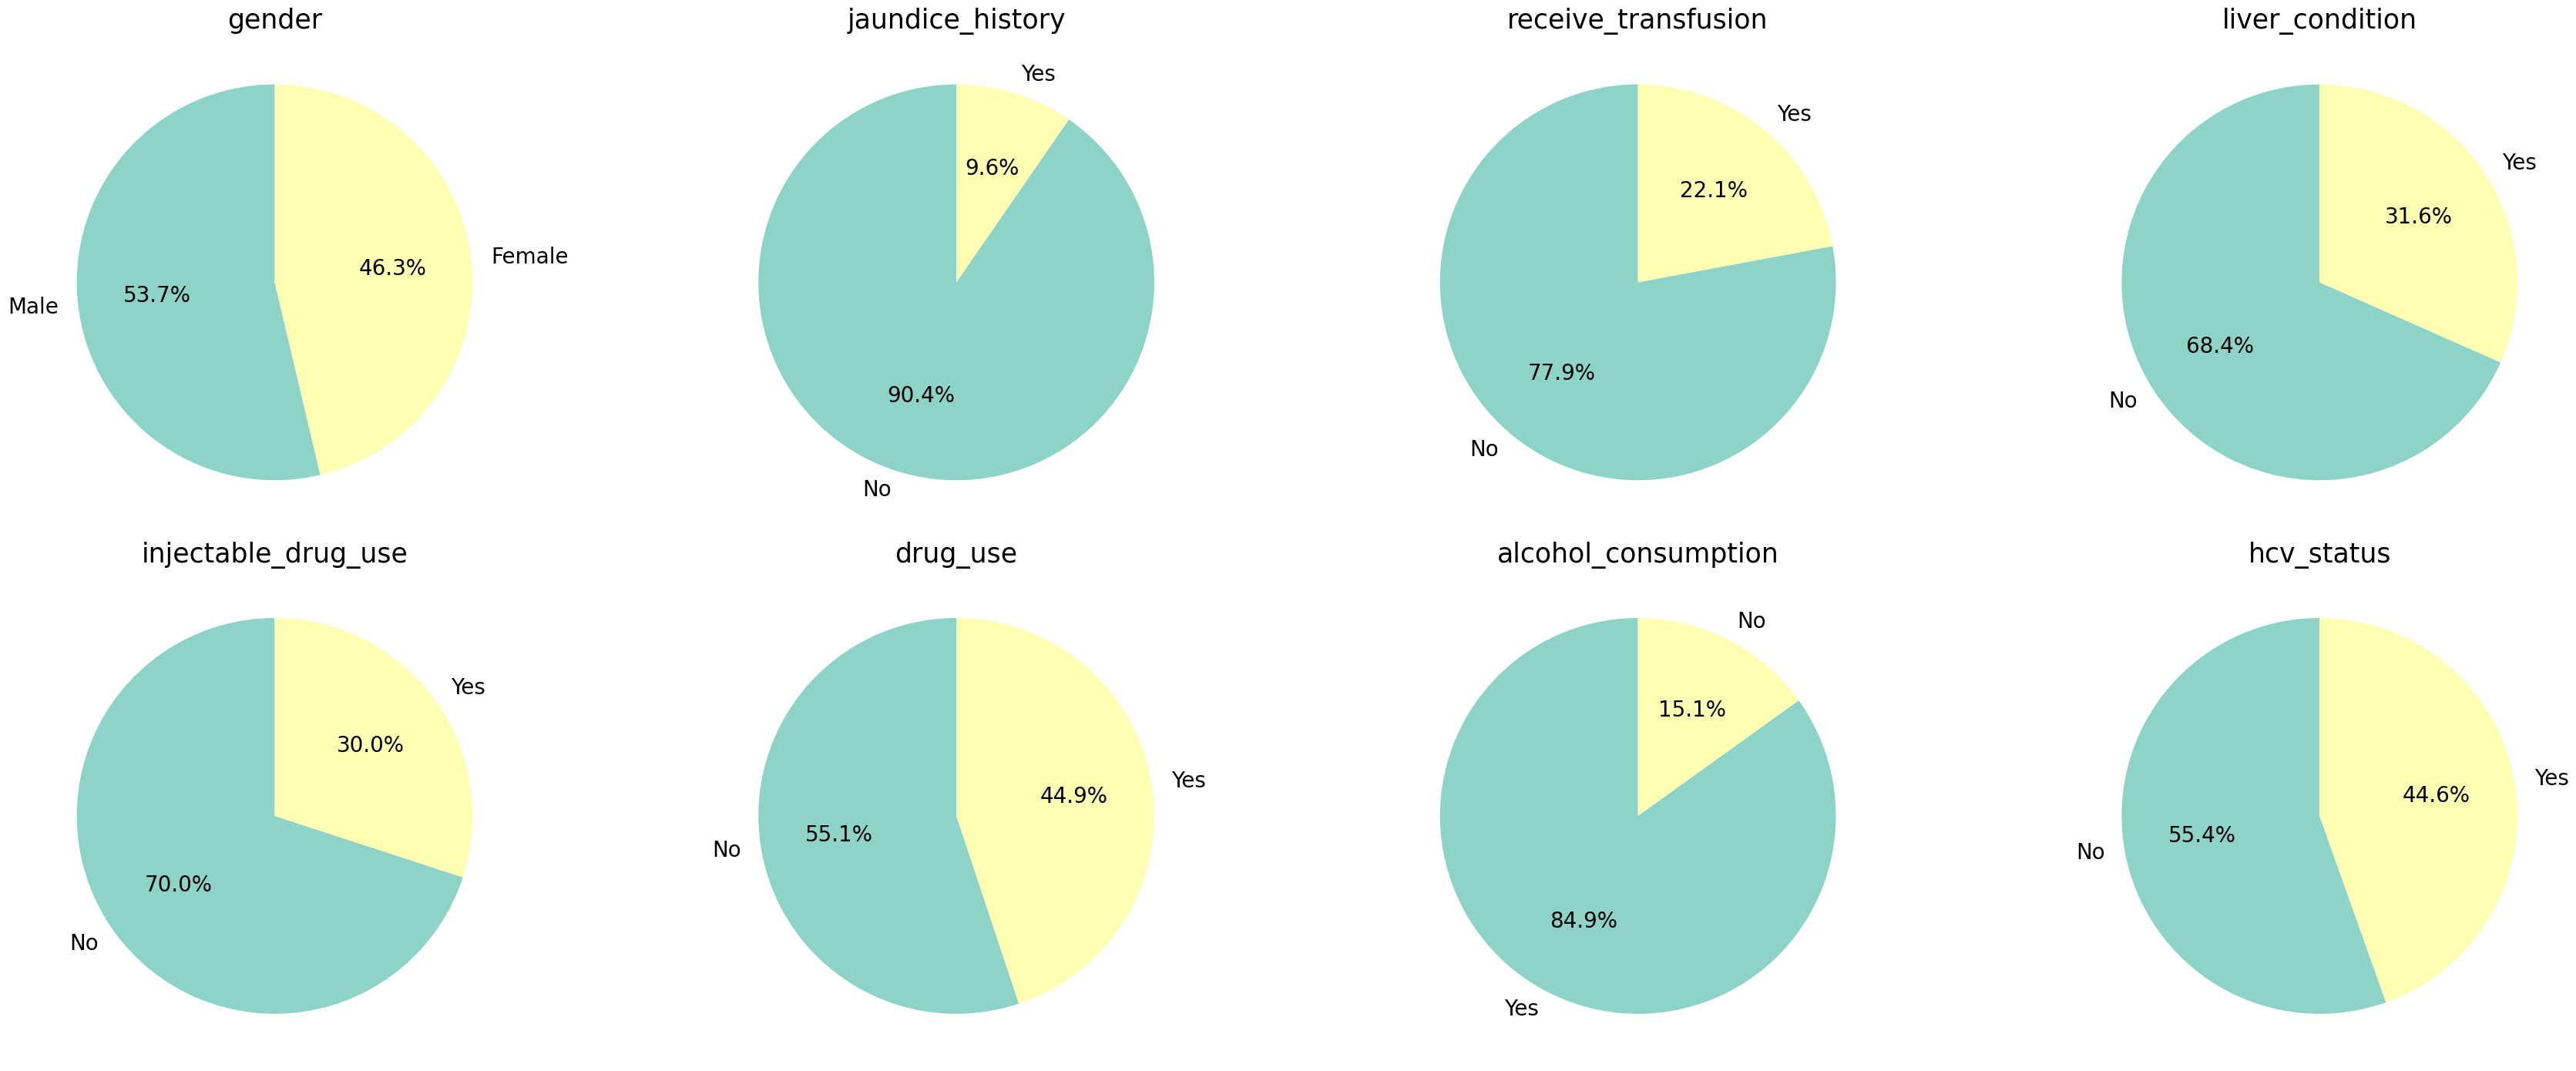

In [43]:
n_cols = len(cat_columns)

n_per_row = 4
n_rows = math.ceil(n_cols / n_per_row)

fig, axes = plt.subplots(n_rows, n_per_row, figsize=(n_per_row * 9, n_rows * 7))
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    data = df_cat[col].value_counts()
    color_count = len(data)
    colors = palette[:color_count]
    axes[i].pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        textprops={'fontsize': 20}
    )
    axes[i].set_title(col, fontsize=25)

for j in range(n_cols, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Data Distribution

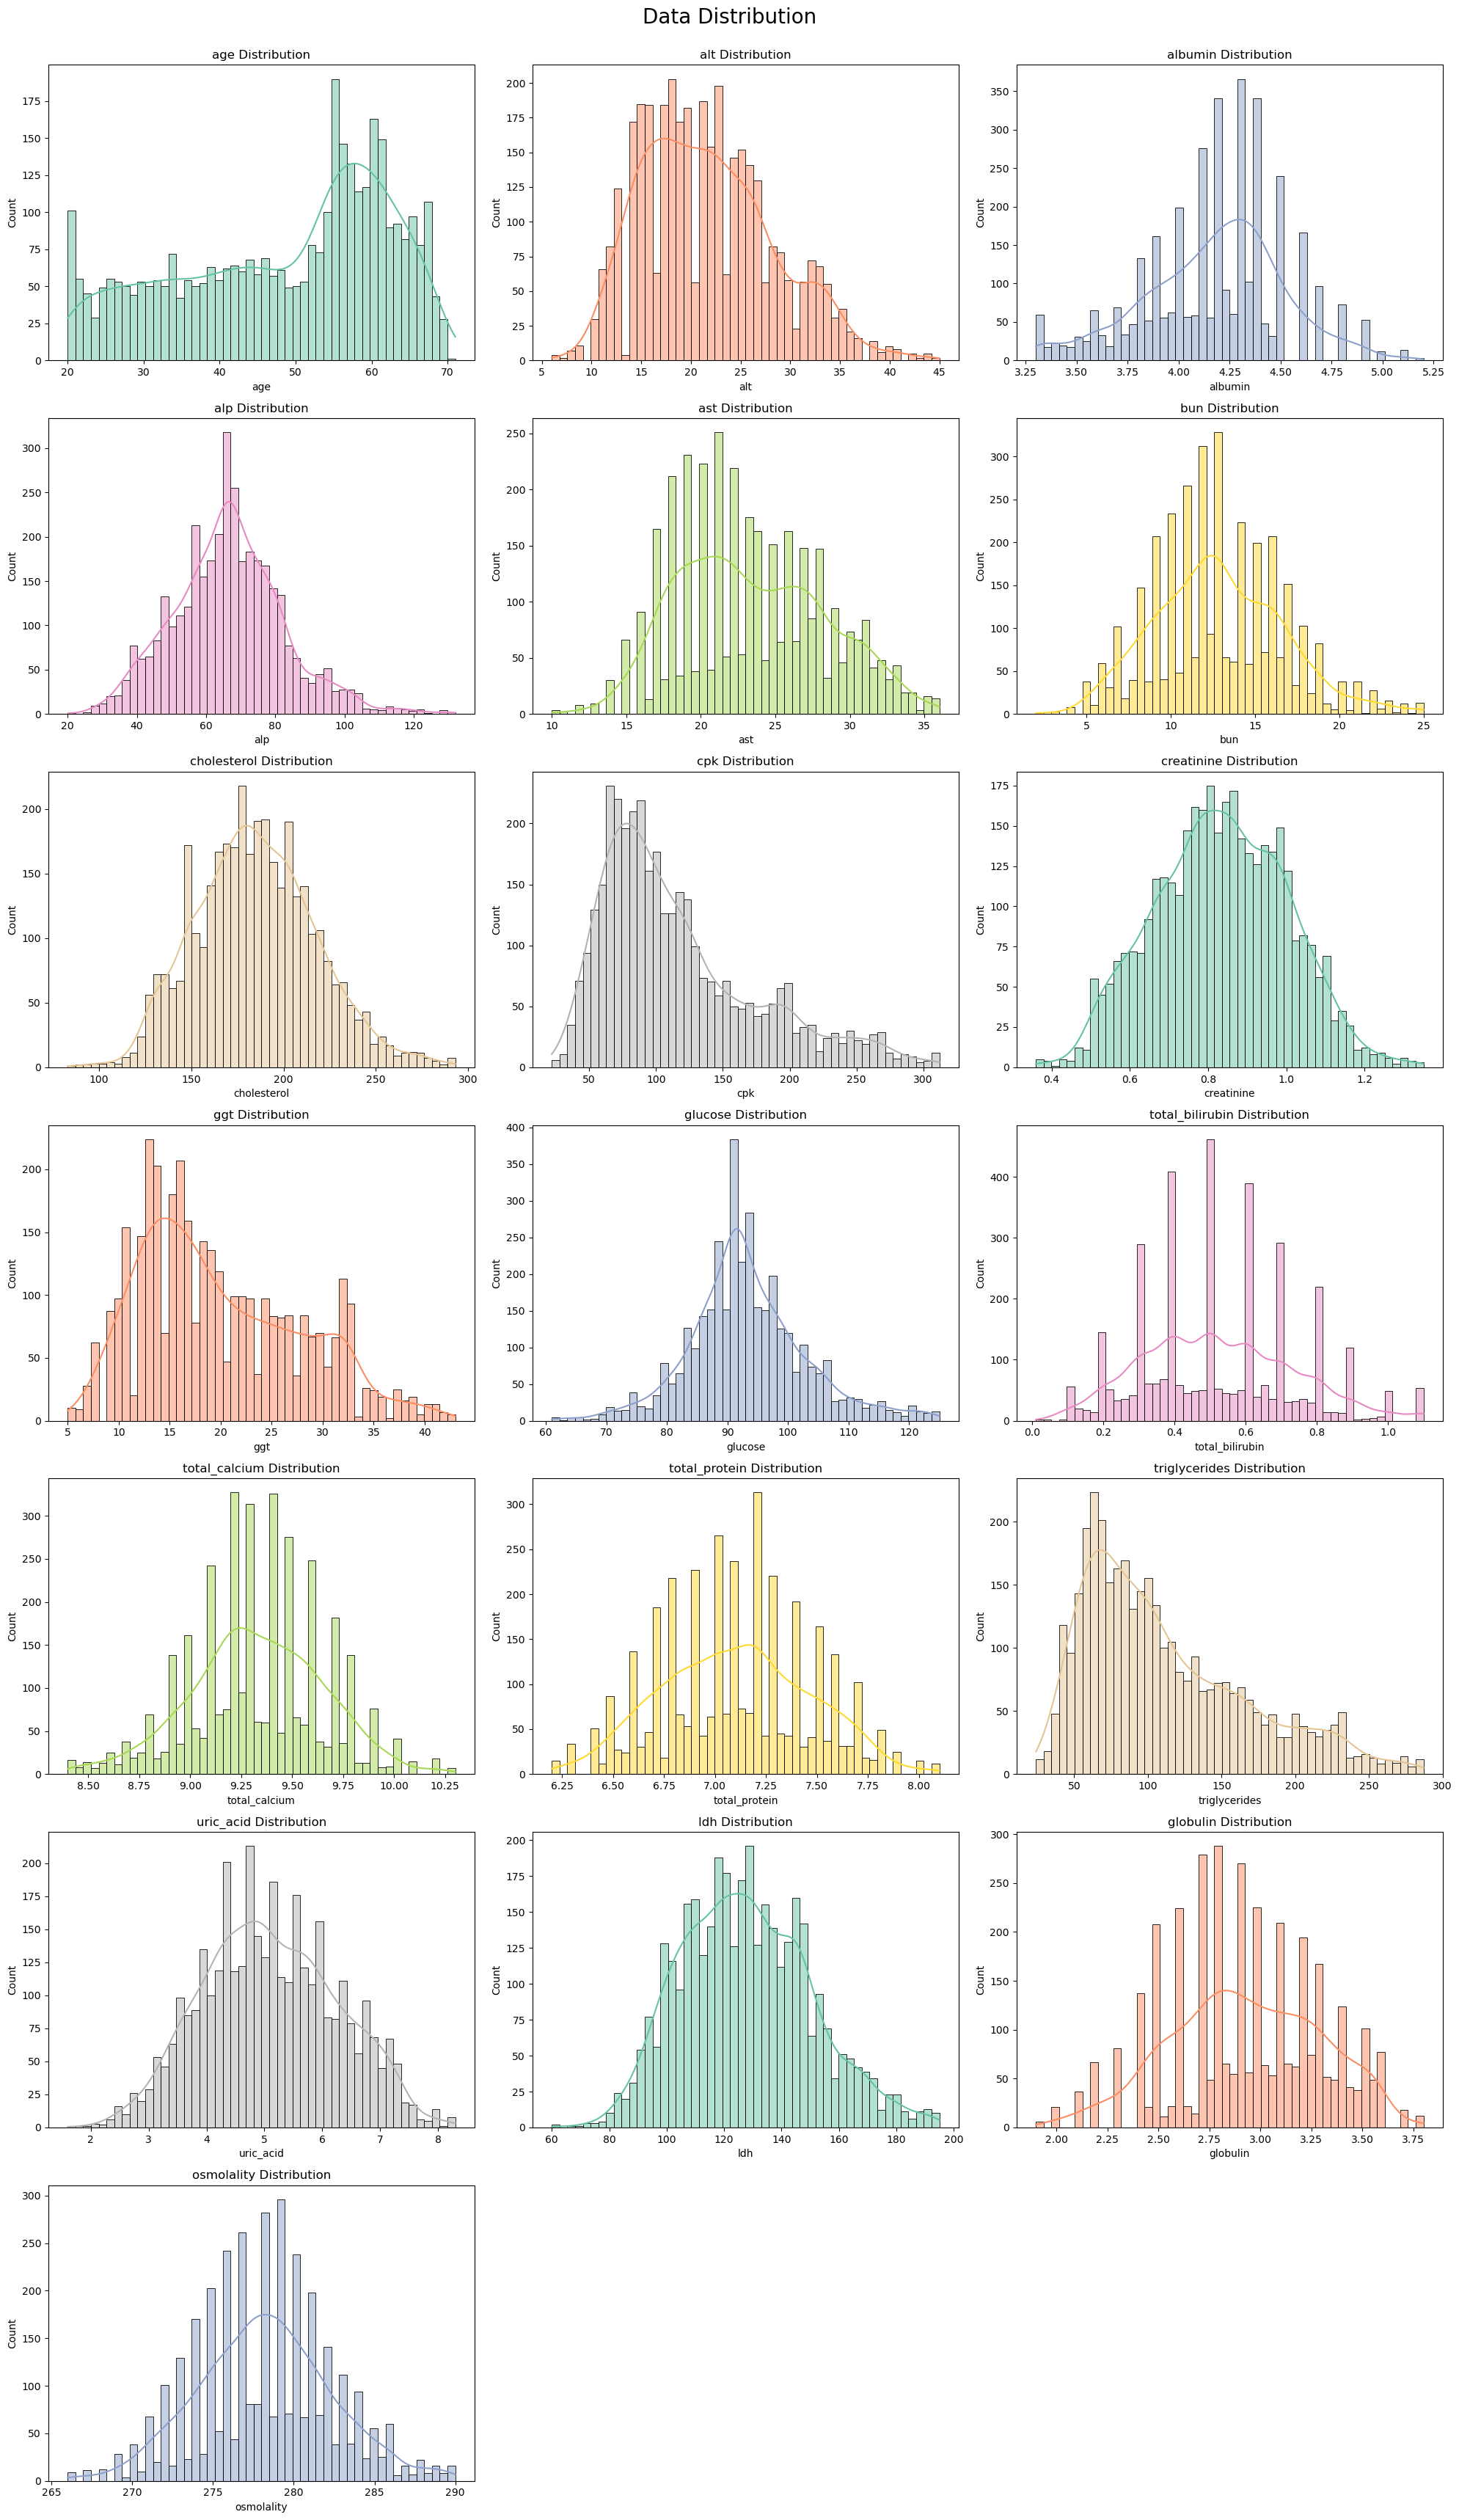

In [44]:
num_columns = ['age',  'alt', 'albumin', 'alp', 'ast', 'bun', 'cholesterol',
               'cpk', 'creatinine', 'ggt', 'glucose', 'total_bilirubin', 'total_calcium',
               'total_protein', 'triglycerides', 'uric_acid', 'ldh', 'globulin', 'osmolality']

cols = 3
rows = math.ceil(len(num_columns) / cols)  

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = np.ravel(axes)

colors = sns.color_palette("Set2", len(num_columns))

for i, col in enumerate(num_columns):
    sns.histplot(df[col], bins=50, kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hapus subplot kosong kalau ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Data Distribution", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


## Box Plot

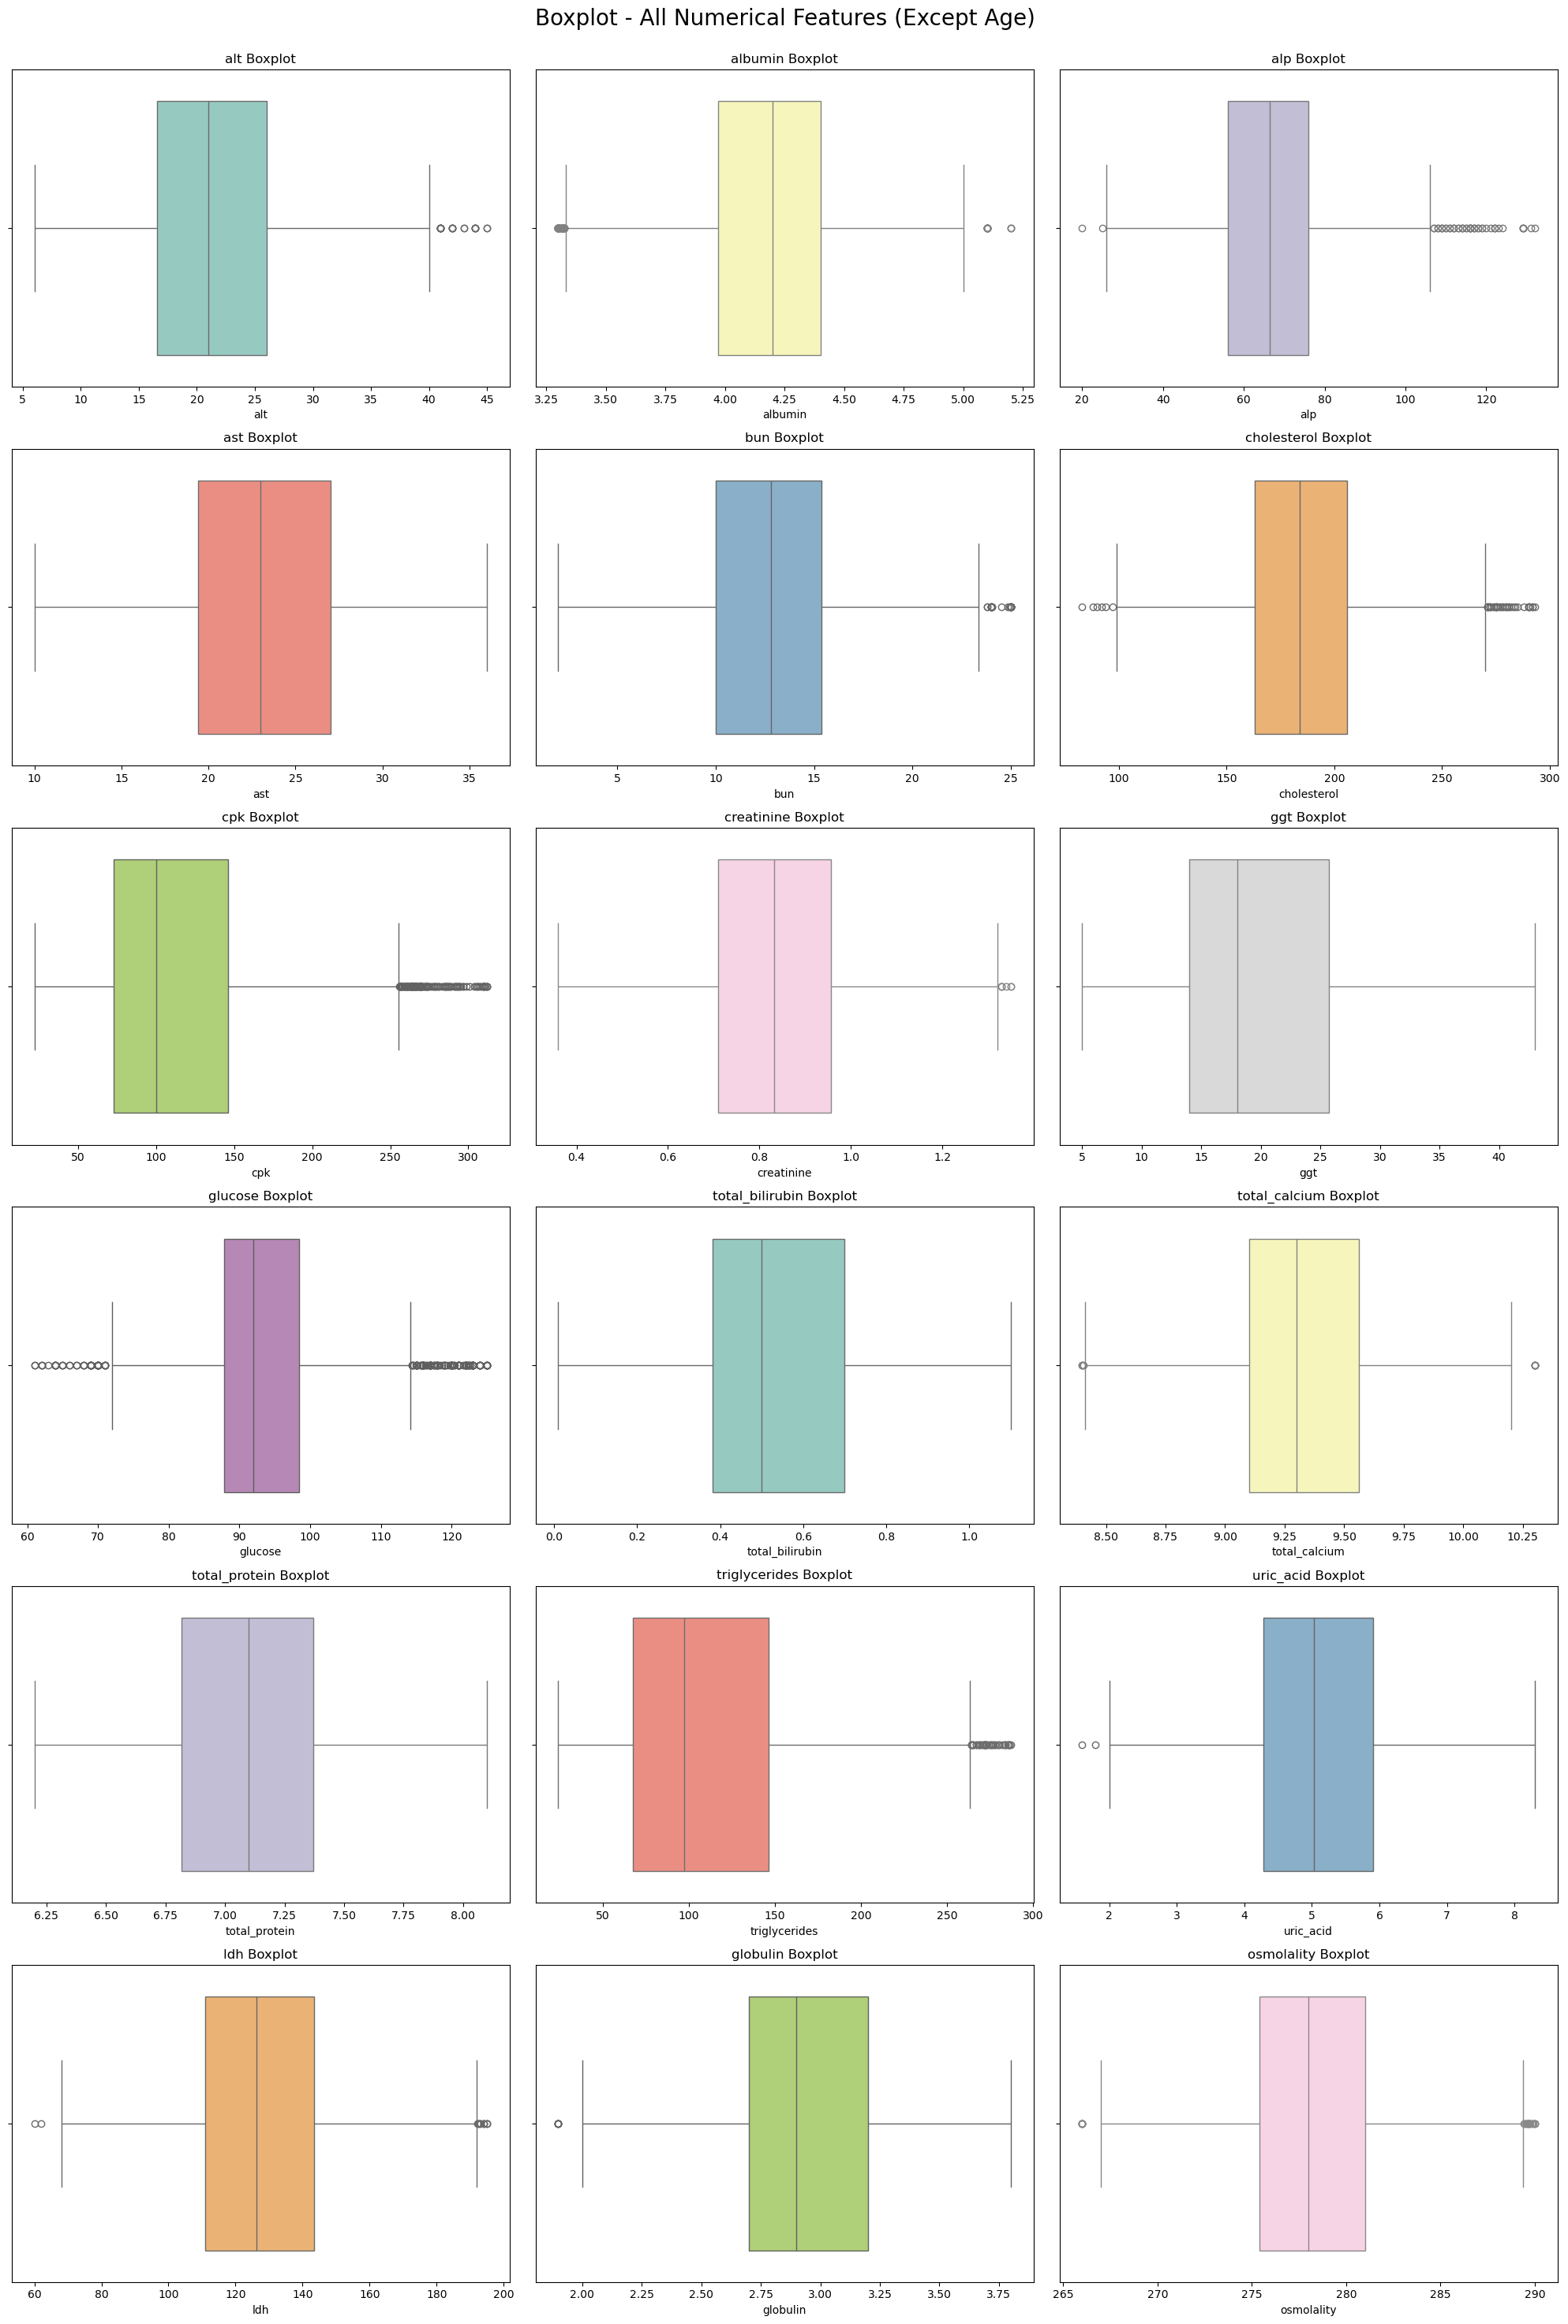

In [45]:
num_columns_no_age = [col for col in num_columns if col != 'age']

cols = 3
rows = math.ceil(len(num_columns_no_age) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(num_columns_no_age):
    sns.boxplot(x=df[col], ax=axes[i], color=palette[i % len(palette)])
    axes[i].set_title(f"{col} Boxplot")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplot - All Numerical Features (Except Age)", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Data Correlation

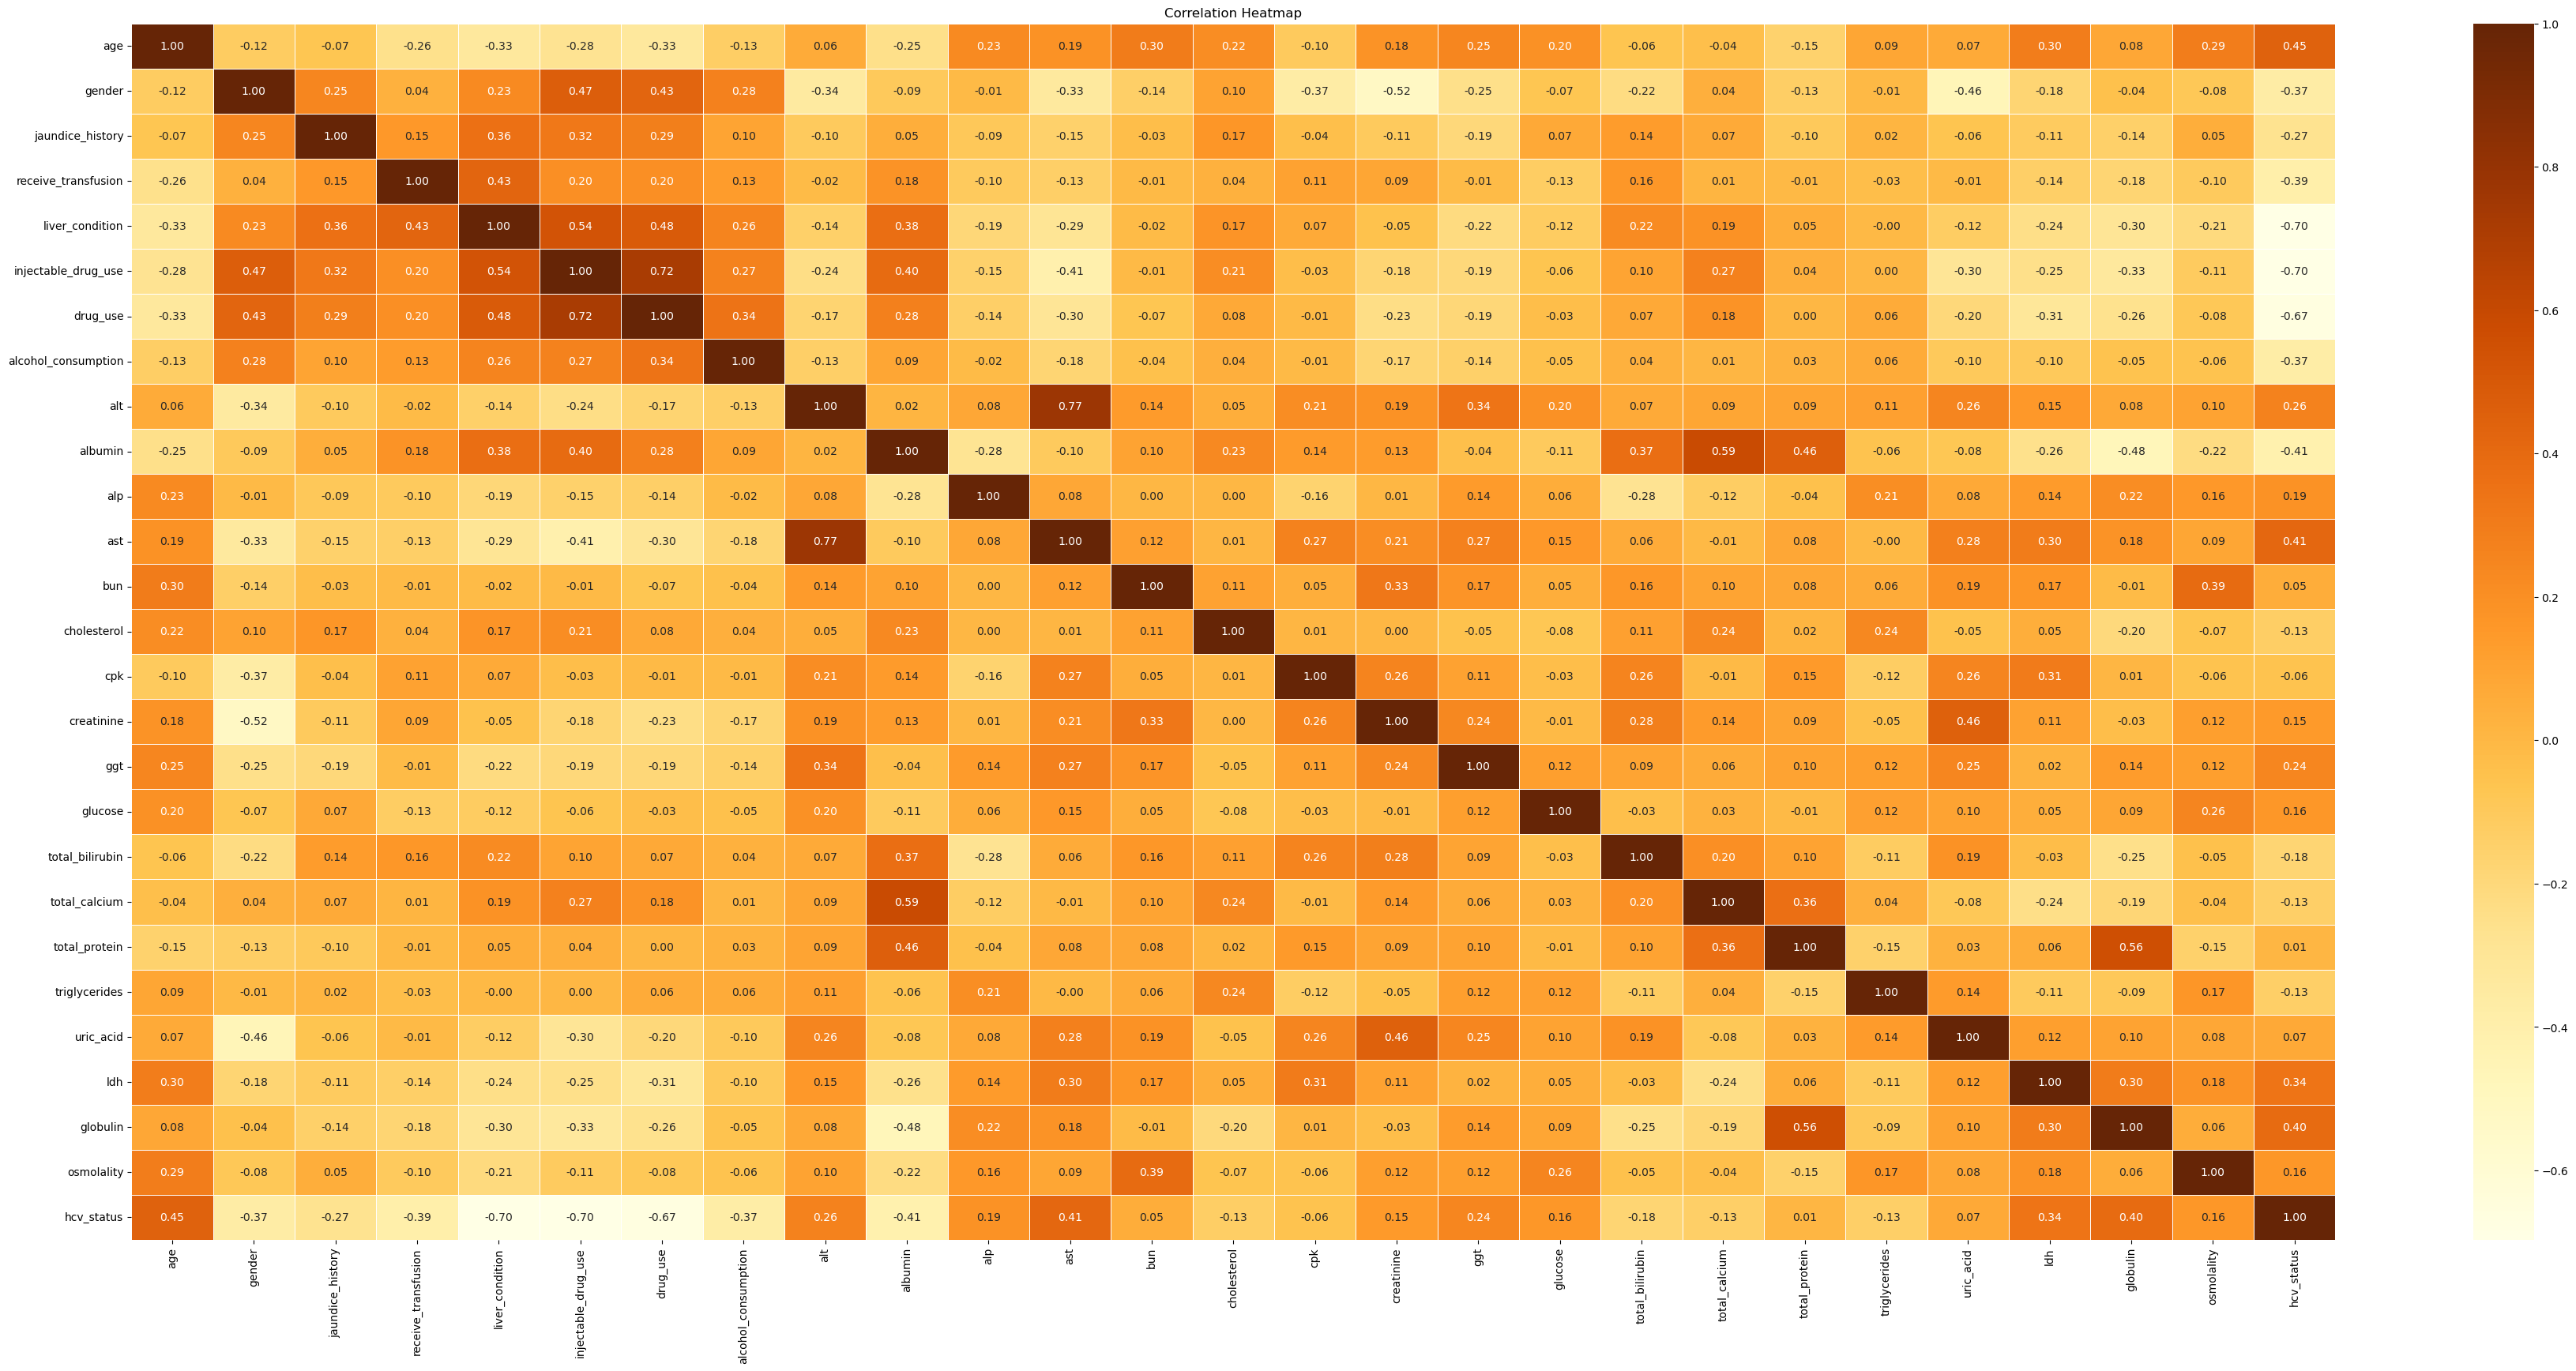

In [46]:
plt.figure(figsize=(45, 20))
sns.heatmap(df.corr(), annot=True, cmap="YlOrBr", fmt=".2f", linewidths=0.5, linecolor="white")
plt.title("Correlation Heatmap")
plt.show()

### Numerical Features vs Target

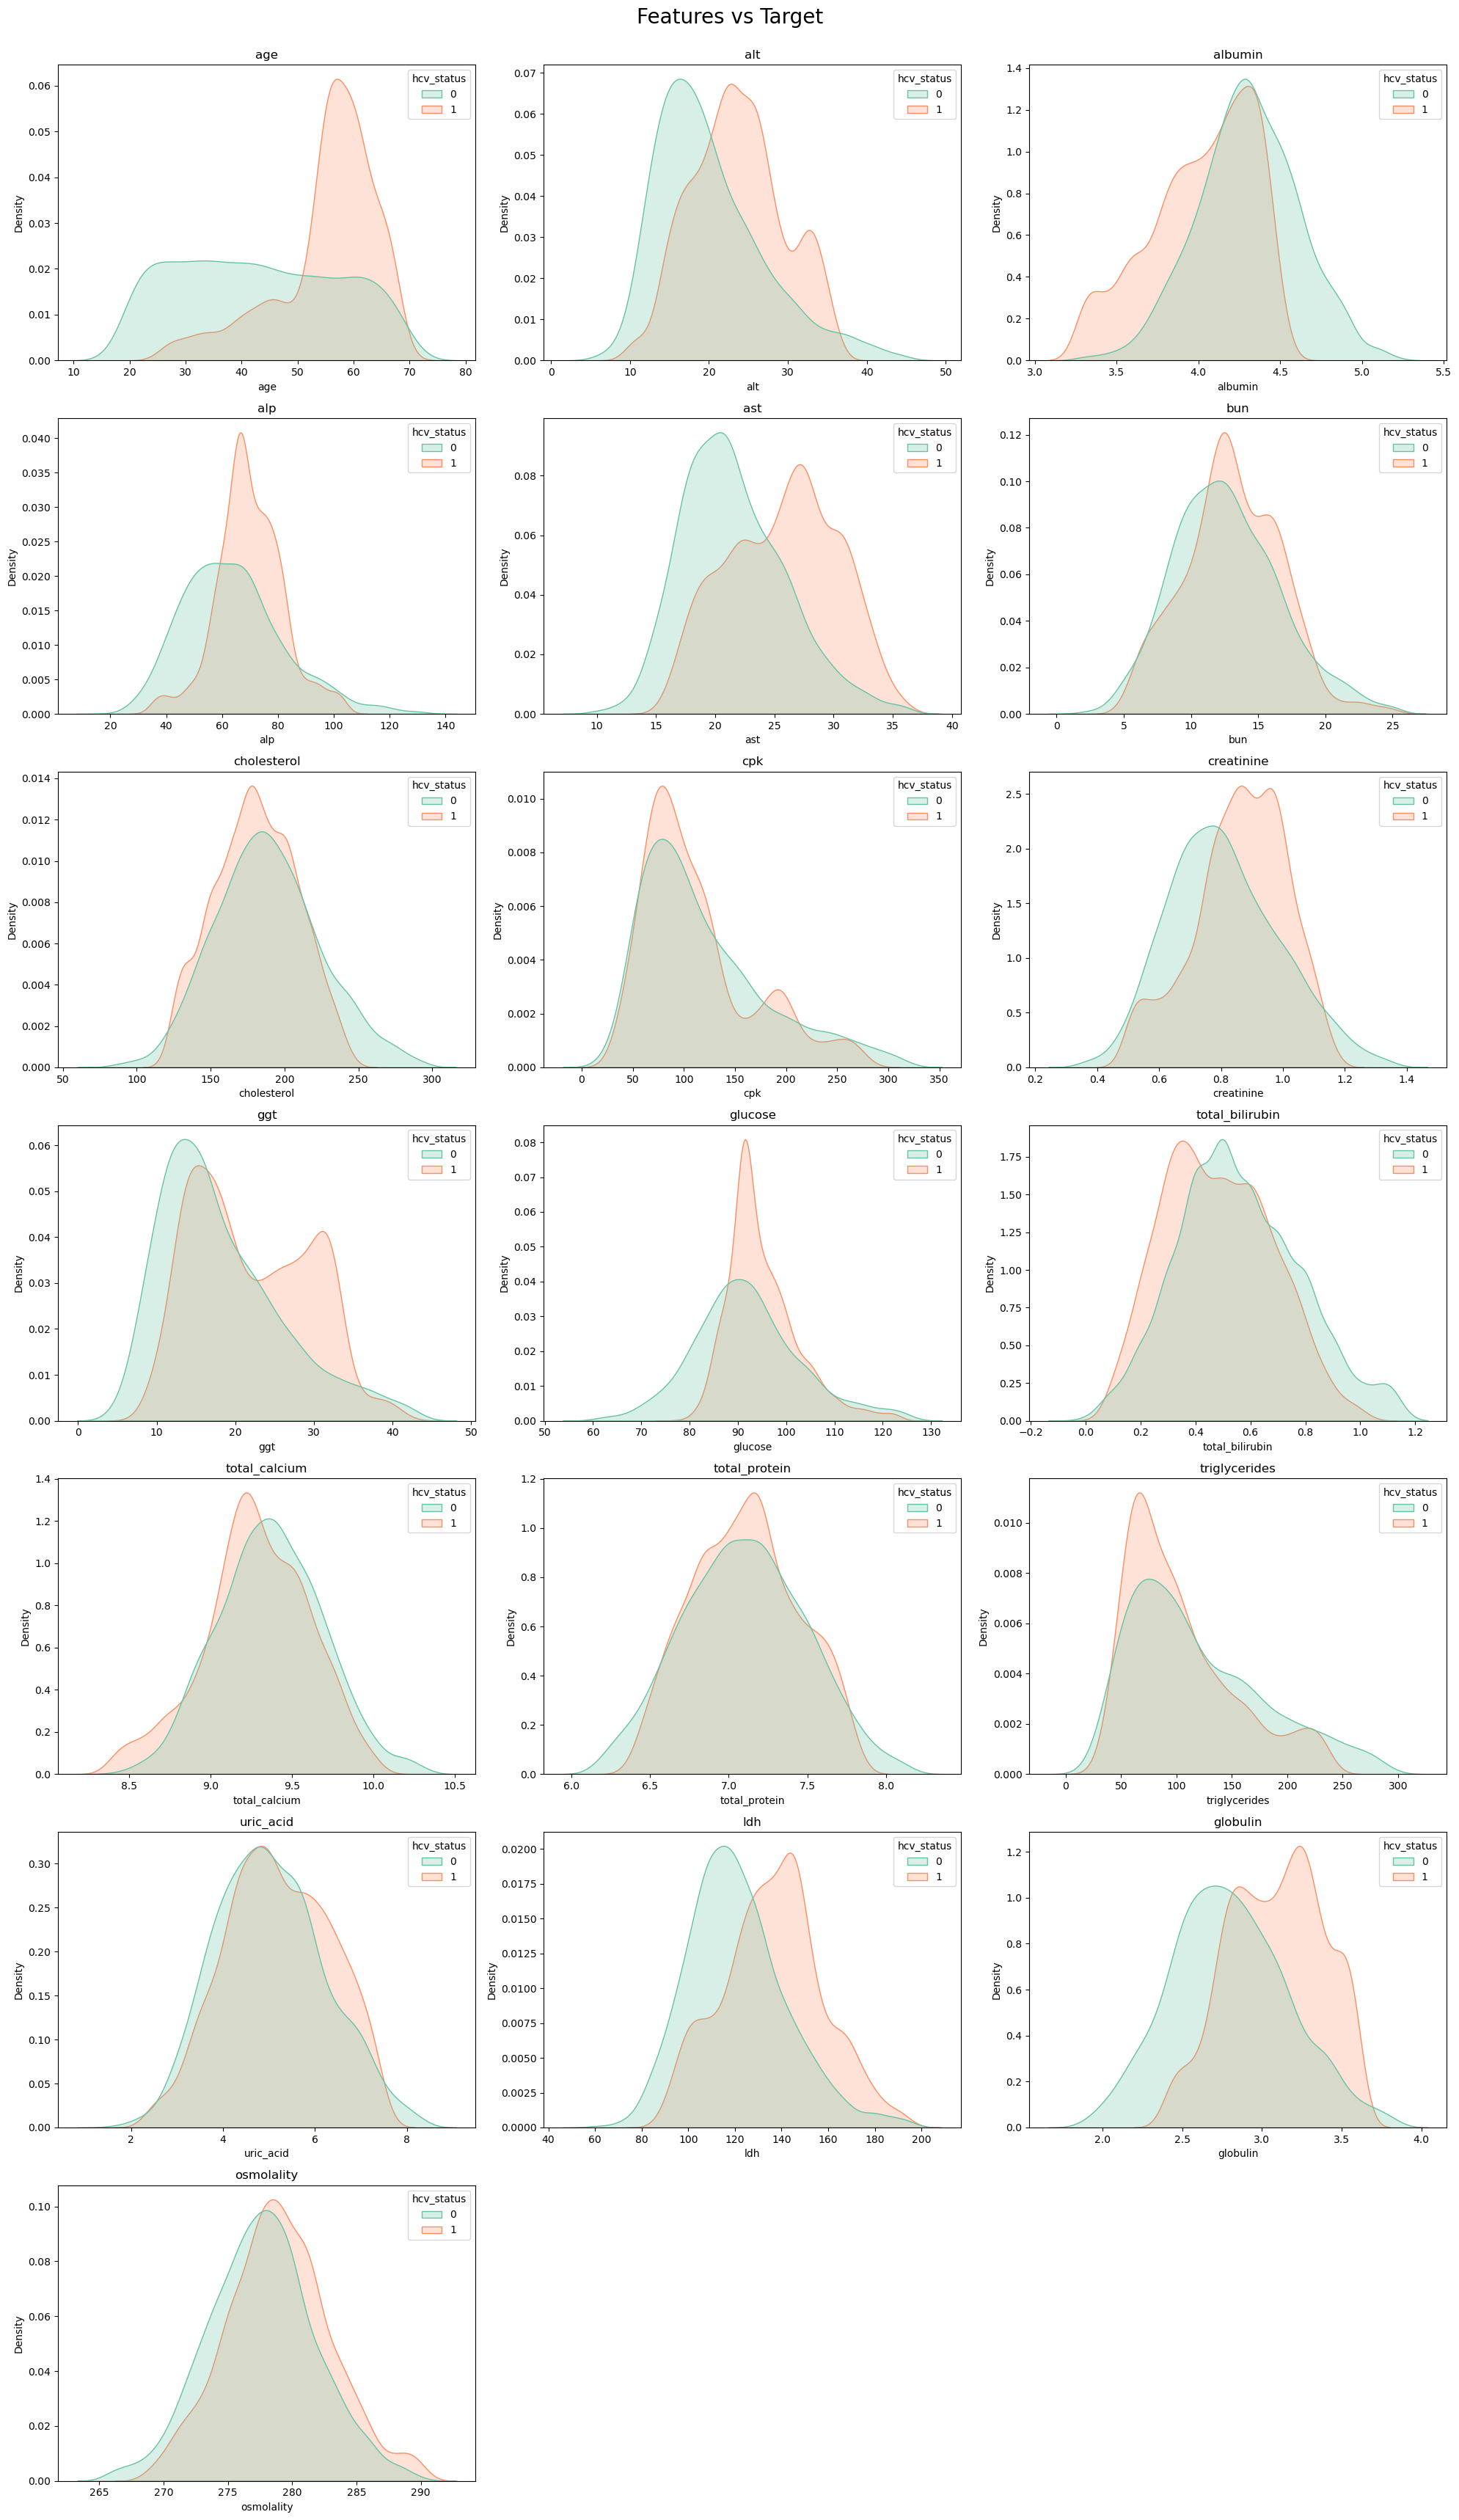

In [47]:
num_columns = df_num.columns  
target = "hcv_status"

cols = 3
rows = math.ceil(len(num_columns) / cols)  

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

colors = sns.color_palette("Set2", len(df[target].unique())) 

for i, col in enumerate(num_columns):
    sns.kdeplot(data=df, x=col, hue=target, fill=True, common_norm=False,
                palette=colors, ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Features vs Target", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Categorical Feature Vs Target

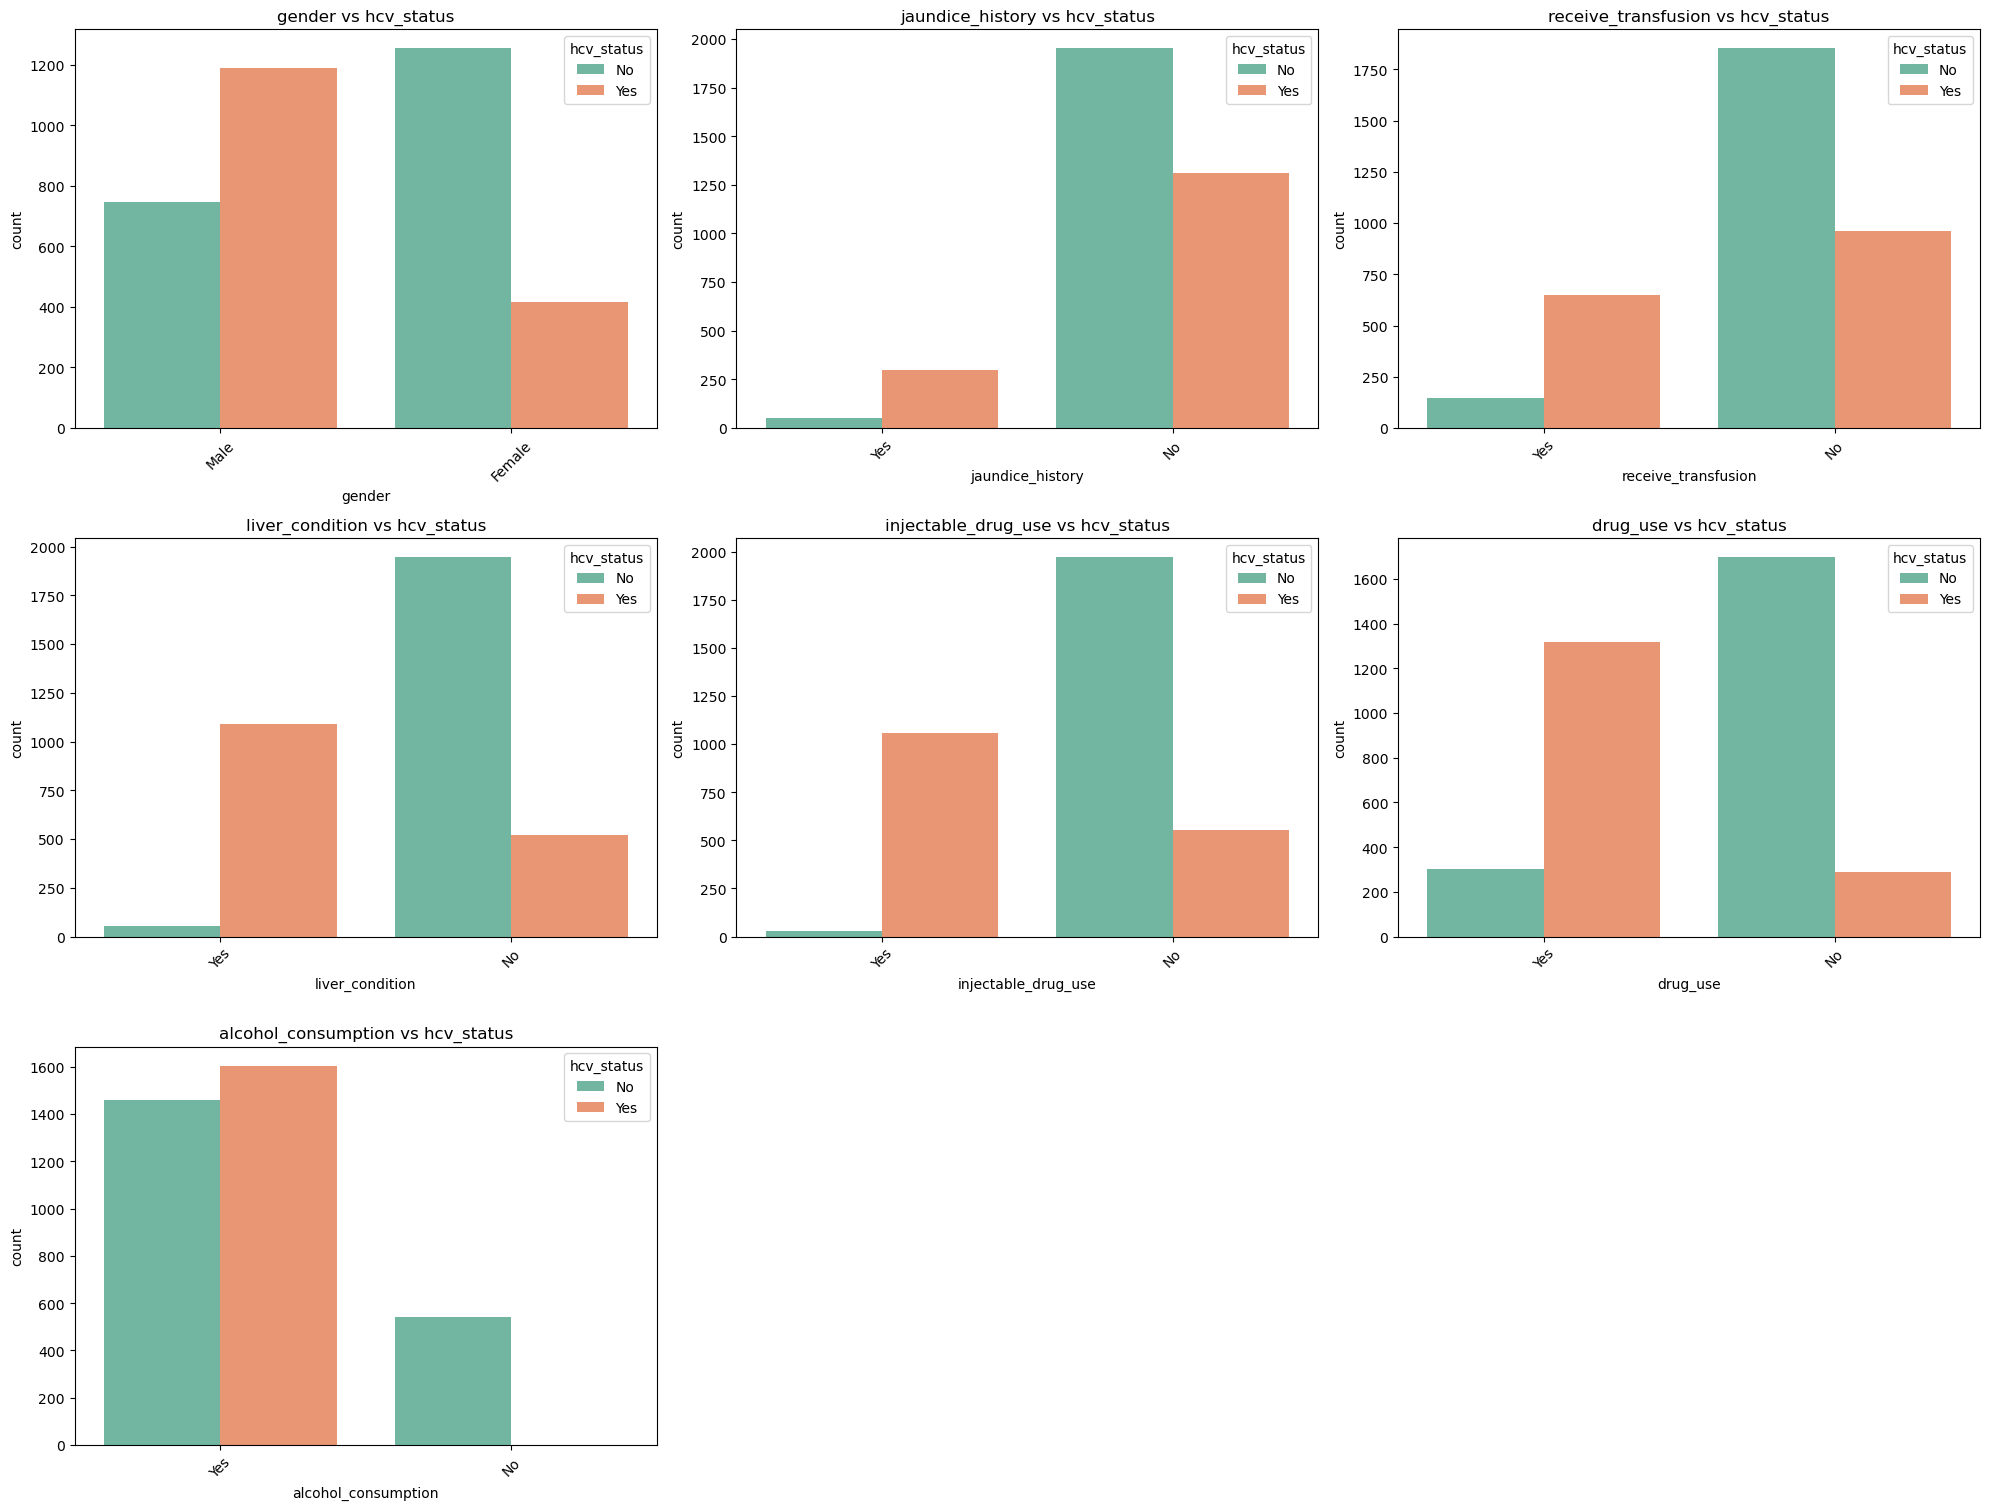

In [48]:
cols = 3
rows = math.ceil(len(num_columns) / cols)  

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))

axes = axes.flatten()

for i, col in enumerate(cat_columns[:-1]):
    sns.countplot(data=df_cat, x=col, hue="hcv_status", palette=colors, ax=axes[i])
    axes[i].set_title(f"{col} vs hcv_status")
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Feature Importance

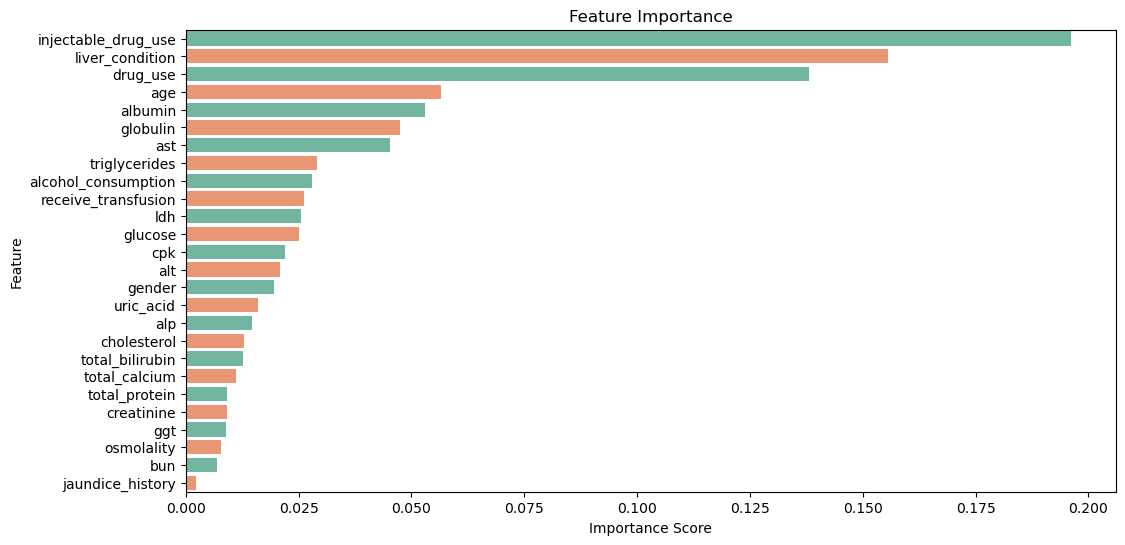

In [49]:
X_train = df.drop(columns=["hcv_status"])
y_train = df["hcv_status"]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df,  palette=colors)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()